# 1. Introduction

Instacart is an online grocery delivery service. This dataset contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. The goal is to use this data to predict which products a user will buy again.


# 2. Data Loading


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
PATH_TO_FOLDER = "/Users/mmosvlad/Library/CloudStorage/GoogleDrive-optimus3b59@gmail.com/My Drive/project_data/"

orders = pd.read_csv(f'{PATH_TO_FOLDER}orders.csv')
order_products_prior = pd.read_csv(
    f'{PATH_TO_FOLDER}order_products__prior.csv')
order_products_train = pd.read_csv(
    f'{PATH_TO_FOLDER}order_products__train.csv')
products = pd.read_csv(f'{PATH_TO_FOLDER}products.csv')
aisles = pd.read_csv(f'{PATH_TO_FOLDER}aisles.csv')
departments = pd.read_csv(f'{PATH_TO_FOLDER}departments.csv')

# 3. Data Overview


In [4]:
print("Orders Dataset:")
display(orders.head())

print("Order Products Prior Dataset:")
display(order_products_prior.head())

print("Products Dataset:")
display(products.head())

Orders Dataset:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Order Products Prior Dataset:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Products Dataset:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Orders Dataset:

<li>order_id: Unique identifier for each order.</li>
<li>user_id: Unique identifier for each user.</li>
<li>eval_set: Indicates which dataset (train, test, prior) this order belongs to.</li>
<li>order_number: The order sequence number for this user (1 = first, n = nth).</li>
<li>order_dow: The day of the week the order was placed on.</li>
<li>order_hour_of_day: The hour of the day the order was placed on.</li>
<li>days_since_prior_order: Days since the last order, NaN for first order.</li>

Order Products Prior Dataset:

<li>order_id: Unique identifier for each order.</li>
<li>product_id: Unique identifier for each product.</li>
<li>add_to_cart_order: Order in which each product was added to cart.</li>
<li>reordered: 1 if this product has been ordered by this user in the past, 0 otherwise.</li>

Products Dataset:

<li>product_id: Unique identifier for each product.</li>
<li>product_name: Name of the product.</li>
<li>aisle_id: Identifier for the aisle of the product.</li>
<li>department_id: Identifier for the department of the product.</li>


# 4. Data Visualization


## 4.1 Orders Analysis


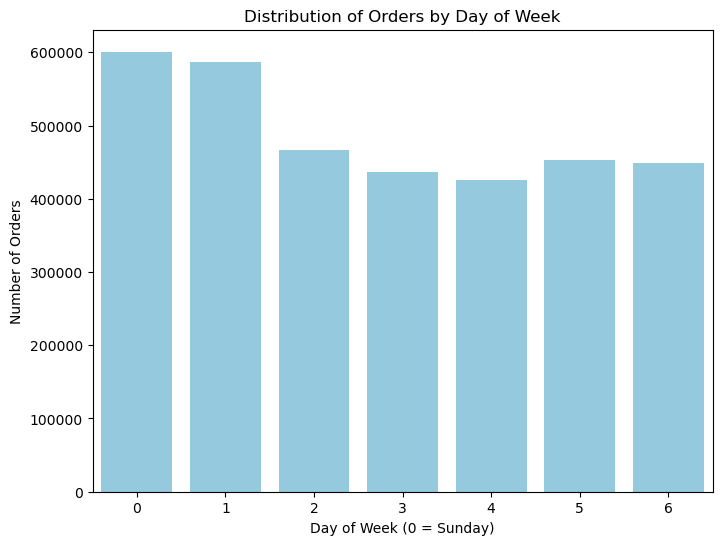

In [ ]:
# Distribution of Orders by Day of Week
plt.figure(figsize=(8, 6))
sns.countplot(x='order_dow', data=orders, color='skyblue')
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week (0 = Sunday)')
plt.ylabel('Number of Orders')
plt.show()

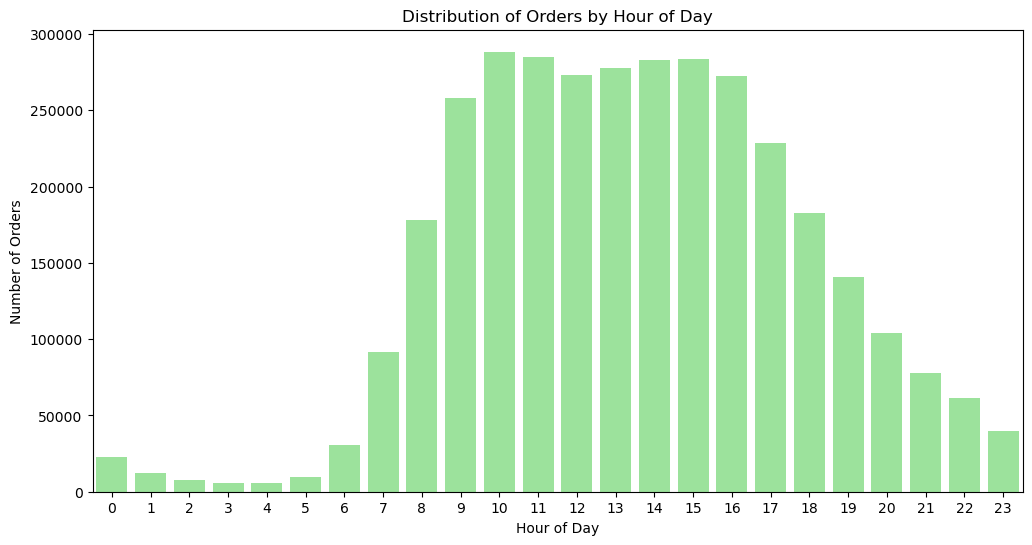

In [ ]:
# Distribution of Orders by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour_of_day', data=orders, color='lightgreen')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

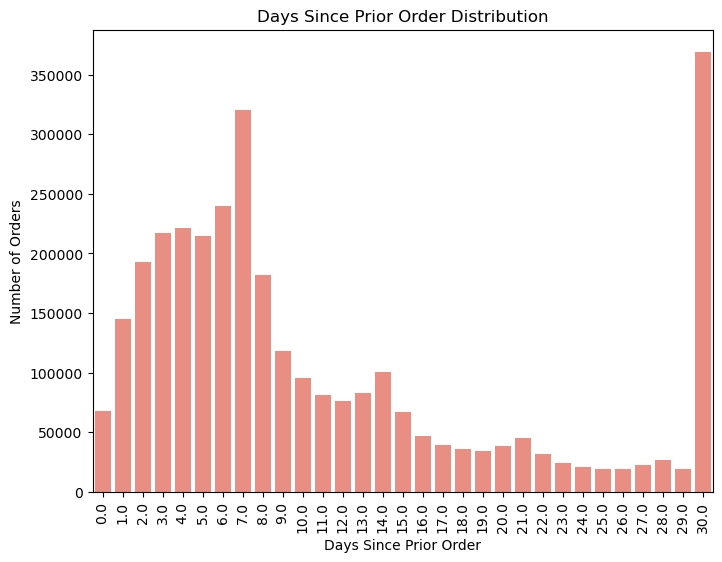

In [10]:
# Days Since Prior Order Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='days_since_prior_order', data=orders, color='salmon')
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.xticks(rotation='vertical')
plt.show()

## 4.2 Products Analysis


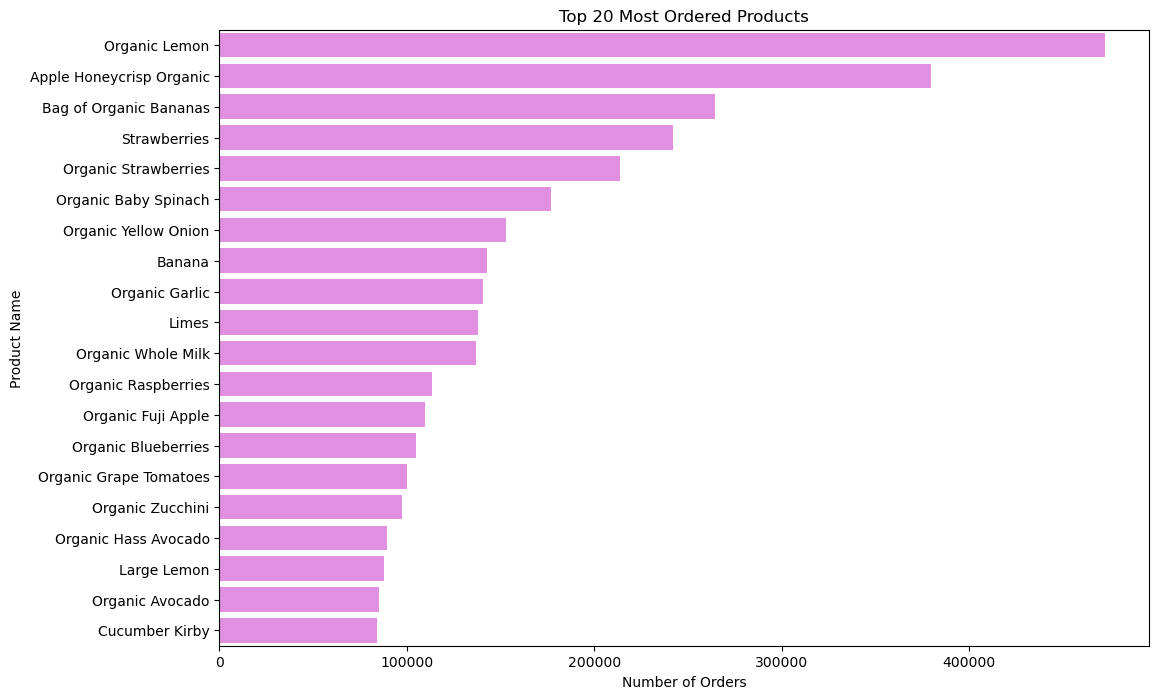

In [ ]:
# Top 20 Most Ordered Products
product_counts = order_products_prior['product_id'].value_counts().head(20)
top_products = products[products['product_id'].isin(product_counts.index)]

plt.figure(figsize=(12, 8))
sns.barplot(x=product_counts.values,
            y=top_products['product_name'], orient='h', color='violet')
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

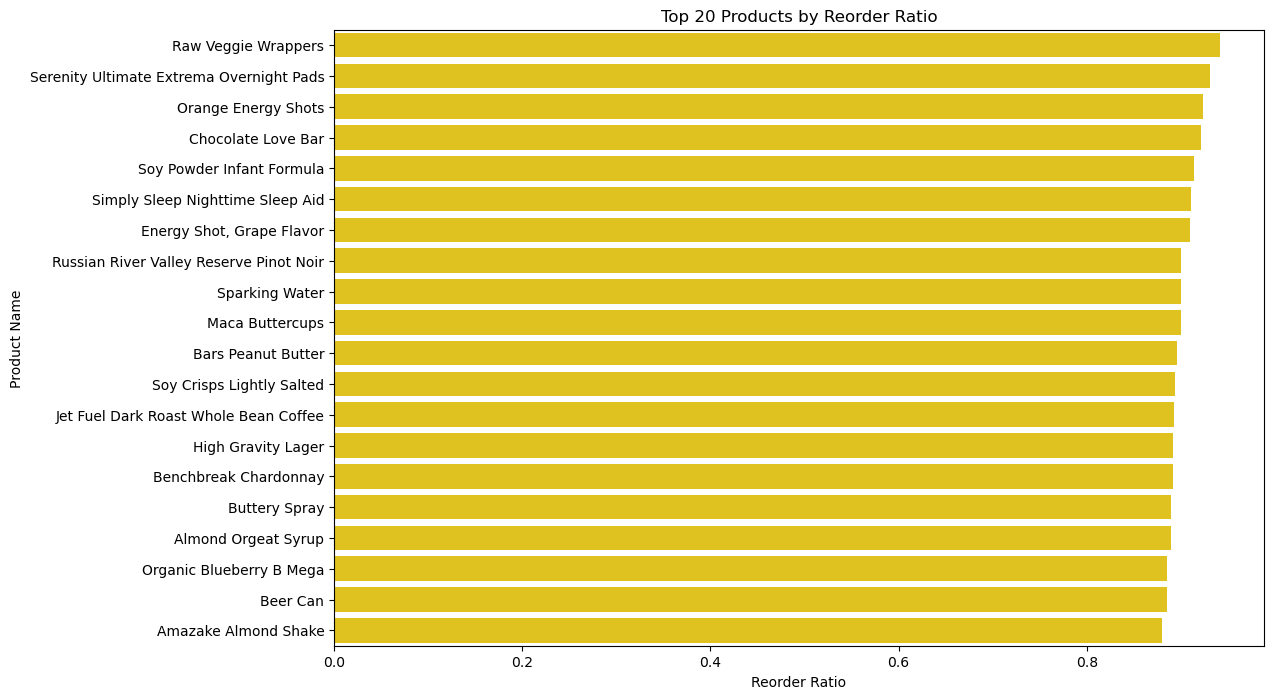

In [ ]:
# Reorder Ratio of Products
reorder_ratio = order_products_prior.groupby(
    'product_id')['reordered'].mean().reset_index()
reorder_ratio = reorder_ratio.merge(products, on='product_id')
top_reordered = reorder_ratio.sort_values(
    'reordered', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='reordered', y='product_name',
            data=top_reordered, orient='h', color='gold')
plt.title('Top 20 Products by Reorder Ratio')
plt.xlabel('Reorder Ratio')
plt.ylabel('Product Name')
plt.show()

## 4.3 User Behavior Analysis


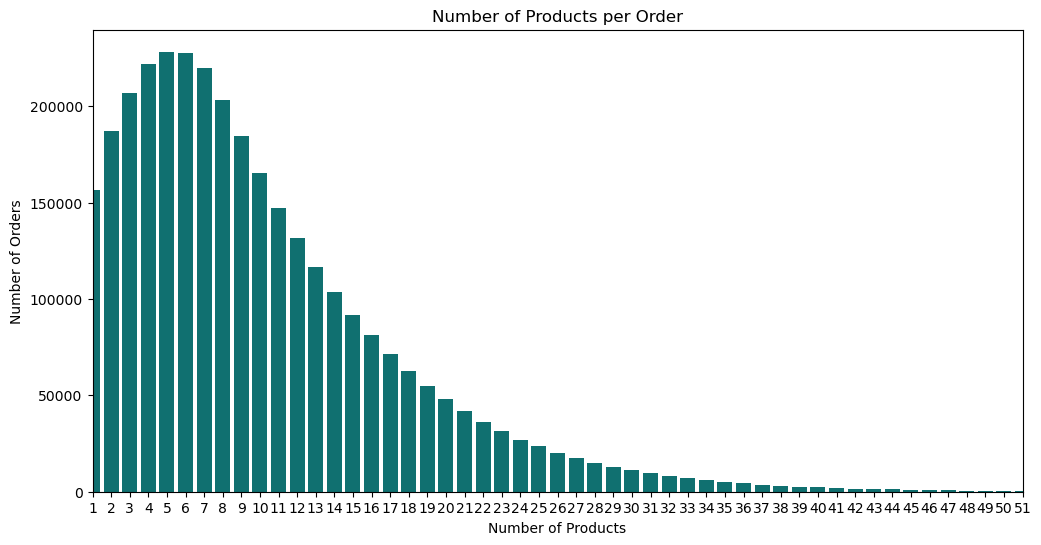

In [ ]:
# Number of Products per Order
order_size = order_products_prior.groupby(
    'order_id')['add_to_cart_order'].max().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=order_size.index, y=order_size.values, color='teal')
plt.title('Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.xlim(0, 50)
plt.show()

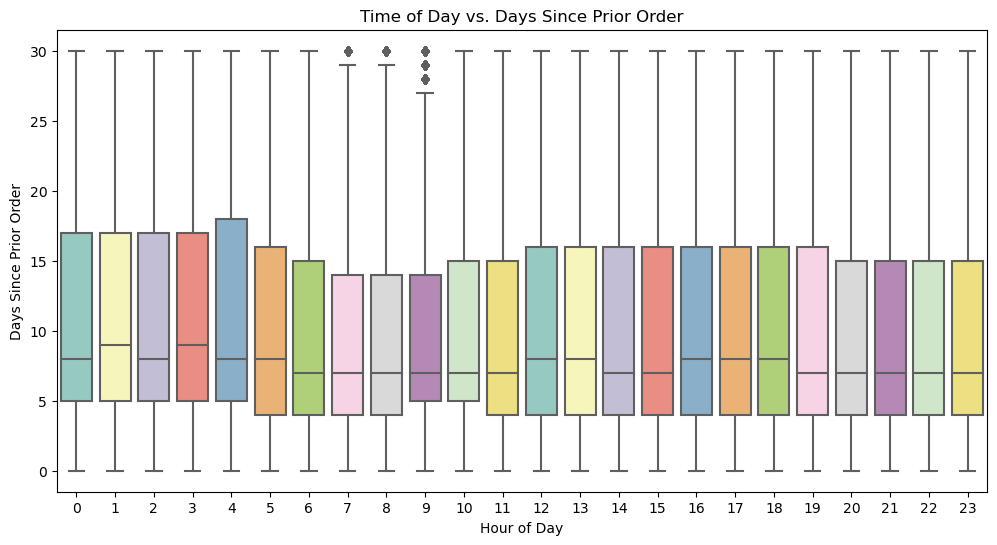

In [ ]:
# Time of Day vs. Days Since Prior Order
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour_of_day', y='days_since_prior_order',
            data=orders, palette='Set3')
plt.title('Time of Day vs. Days Since Prior Order')
plt.xlabel('Hour of Day')
plt.ylabel('Days Since Prior Order')
plt.show()

# 5. Correlation Analysis


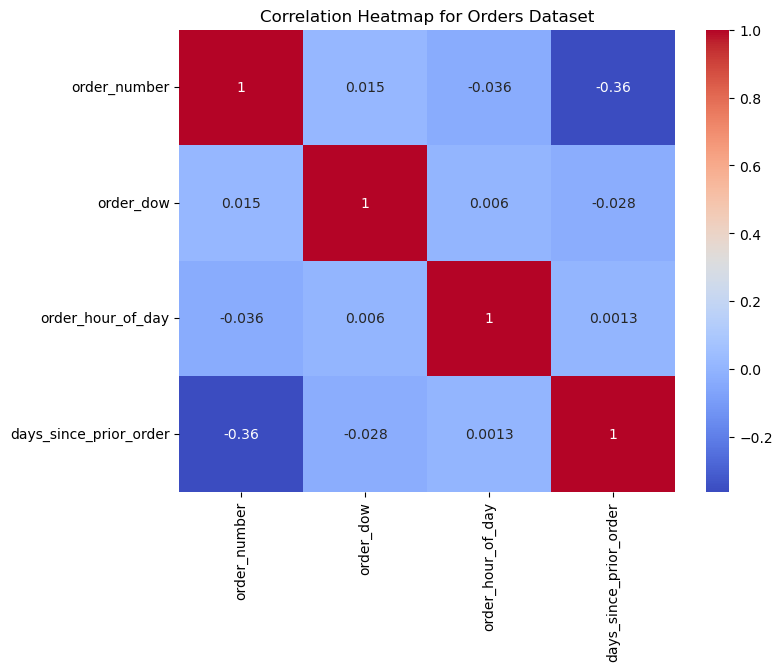

In [ ]:
# Correlation Heatmap for Orders Dataset
corr = orders[['order_number', 'order_dow',
               'order_hour_of_day', 'days_since_prior_order']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Orders Dataset')
plt.show()

# 6. Insights


<li>Peak Ordering Times: Most orders are placed during the hours of 10 AM to 4 PM, with a peak around 10 AM.</li>
<li>Popular Days for Orders: The busiest days are Sunday and Monday (represented by 0 and 1).</li>
<li>Reorder Patterns: Certain products have a very high reorder ratio, indicating customer loyalty or necessity.</li>
<li>Order Size: Majority of the orders contain around 5 to 15 products.</li>
<li>Customer Behavior: There is a trend where customers tend to reorder after 7, 14, 21, or 30 days, suggesting a weekly or monthly shopping pattern.</li>
<li>Time Between Orders: Customers who order later in the day tend to have a longer gap since their previous order.</li>
